# FINANCIAL DATA ANALYSIS PROJECT ON THE __$\color{#0000FF}{\text {TUNISIAN MARKET}}$__

# ( __$\color{#0000FF}{\text {TUNINDEX}}$__ & __$\color{#0000FF}{\text {TUNINDEX20}}$__ ) 

# __PRESENTED BY :__ 

* ####  $\color{#008080}{\text {Abdelkabir Fadi}}$


##  __$\color{#0000FF}{\text {TUNINDEX}}$__ OR __$\color{#0000FF}{\text {TUNINDEX20}}$__?

#### In this project i will work on the tunisian market and try to extract the best decision for an investor who is not RISK TAKER, and he or she wants to play safe.
#### so based on that profile i will build my project and choose the best index for this profile.
#### First: how am i going to avoid the risk of CUT loosing?:
- ####  __$\color{#0000FF}{\text {Diversification:}}$__
    * ####  volatility
    * ####  return 

#### Second: how am i going to make sure that my index is anamoly free and it is stabel?:
- ####  __$\color{#0000FF}{\text {Anamoly Detection :}}$__
    * ####  Long Short-Term Memory(LSTM)
    * ####  mean absolute error

#### Third: how am i going to choose the best components from the index ?:
- ####  __$\color{#0000FF}{\text { Correlation matrix :}}$__
    * ####  components selection
    * ####  profit anaysis
    
#### In the end based on the previous analysis i will make my decision.

# __$\color{#0000FF}{\text {I .}}$__ IMPORTING LIBRARIES

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob # to import set of data
from sklearn.cluster import KMeans # to classify the data
from sklearn.preprocessing import StandardScaler # to scale the data
from scipy import cluster # to make clusters within the classification
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
# to make and repeate the layers that we are going to apply on the data

import tensorflow as tf 
pd.options.mode.chained_assignment = None
import seaborn as sns
from matplotlib.pylab import rcParams

import random
import plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as pyo

#fixing some params
sns.set(style='whitegrid', palette='muted')
rcParams['figure.figsize'] = 14, 8
np.random.seed(1)
tf.random.set_seed(1)
init_notebook_mode(connected=True)
py.offline.init_notebook_mode(connected = True)
pyo.init_notebook_mode()

##  __$\color{#0000FF}{\text {A .}}$__  TUNINDEX

### __$\color{#0000FF}{\text {1 .}}$__ IMPORTING AND VISUALIZATION COMPONENTS FOR TUNINDEX

[Data Source](https://www.investing.com/indices/tunindex-components): Tunindex components (TUNINDEX) 2015-2020

In [19]:
nomsfichiers = glob(r"C:\Users\asus\Desktop\adf prjt\tunindex\* Historical Data.csv")

In [20]:
dfs = [pd.read_csv(f, thousands=',') for f in nomsfichiers]

In [21]:
new_list_data_frames = []
for entreprise in dfs:
    
    entreprise["Price"] = entreprise["Price"].replace(',', ".").astype(float)
    entreprise["Date"] = pd.to_datetime(entreprise["Date"], infer_datetime_format=True)
    entreprise = entreprise.set_index("Date")
    
    new_list_data_frames.append(entreprise)

In [22]:
listes_prix_fermetures = []

for entreprise in new_list_data_frames:
    close = entreprise["Price"].values
    listes_prix_fermetures.append(close)

dataframe = pd.DataFrame(data = listes_prix_fermetures).T
dataframe=dataframe.iloc[0:1045,:]
dataframe.index=entreprise.index

In [23]:
noms_entreprises = []
for i in range(len(nomsfichiers)):
    x = nomsfichiers[i].split('\\')[-1]
    noms_entreprises.append(x)

In [24]:
new_names=[]
for i in range(len(noms_entreprises)):
    x = noms_entreprises[i].replace(" Historical Data.csv","")
    new_names.append(x)

In [25]:
dataframe.columns = new_names

In [26]:
dataframe=dataframe.iloc[::-1]

In [27]:
dataframe.head()

AB  ADWYA  AETEC  AL  ALKM   AMS  ARTES  ASSAD  AST   ATB  ...  \
Date                                                                      ...   
2015-01-02  19.94   6.33    NaN NaN   NaN  3.55   6.16   5.30  NaN  4.27  ...   
2015-01-06  19.93   6.17    NaN NaN   NaN  3.45   6.25   5.25  NaN  4.27  ...   
2015-01-08  19.93   6.17    NaN NaN   NaN  3.40   6.10   5.30  NaN  4.20  ...   
2015-01-12  19.57   6.09    NaN NaN   NaN  3.35   6.15   5.29  NaN  4.20  ...   
2015-01-13  19.38   6.09    NaN NaN   NaN  3.35   6.26   5.29  NaN  4.20  ...   

              TLS   TPR   TRE  TVAL  UADH  UBCI    UIB  UMED  WIFAK  XABYT  
Date                                                                        
2015-01-02  21.00  3.00  8.20   NaN  7.54   NaN  17.69   NaN    NaN   9.55  
2015-01-06  21.59  3.00  8.28   NaN  7.56   NaN  17.70   NaN    NaN   9.58  
2015-01-08  21.57  3.05  8.29   NaN  7.50   NaN  17.68   NaN    NaN   9.65  
2015-01-12  21.01  3.05  8.25   NaN  7.50   NaN  17.59   NaN    NaN   9.57  
2015-01-13  21.00  3.08  8.40   NaN  7.50   NaN  17.57   NaN    NaN   9.57  

[5 rows x 79 columns]

In [28]:
dataframe.isna().sum().sum()

11225

In [11]:
entreprises_donnee_manquantes = dataframe.columns[ dataframe.isna().sum() != 0 ]

In [12]:
entreprises_donnee_manquantes.shape[0]/79

0.3924050632911392

In [13]:
for entreprise in entreprises_donnee_manquantes:
    print(entreprise)

AETEC
AL
ALKM
AST
BHASS
BHL
BL
BTEI
CIL
HANL
ICF
MIP
PLAST
PLTU
SAMAA
SCB
SIMP
SIPHA
SITS
SMD
SMG
SOTEM
SPDI
STAR
STEQ
TINV
TJL
TVAL
UBCI
UMED
WIFAK


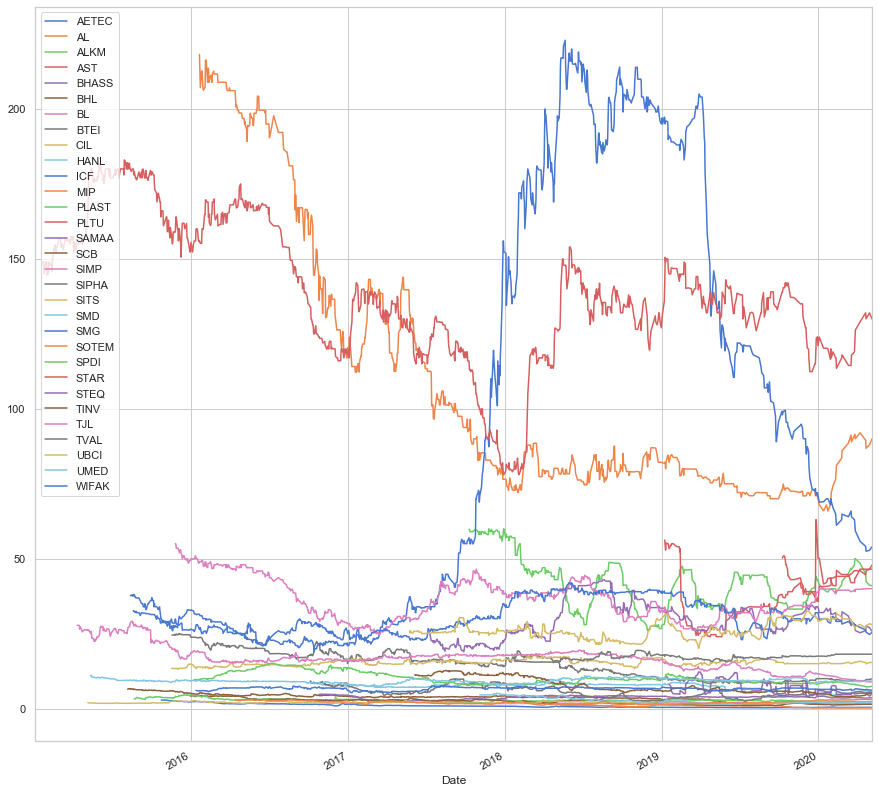

In [14]:
for entreprise in entreprises_donnee_manquantes:
    dataframe.loc[:,entreprise].plot(figsize=(15,15),legend=True);

### __$\color{#0000FF}{\text {2 .}}$__ FILLING MISSING VALUES

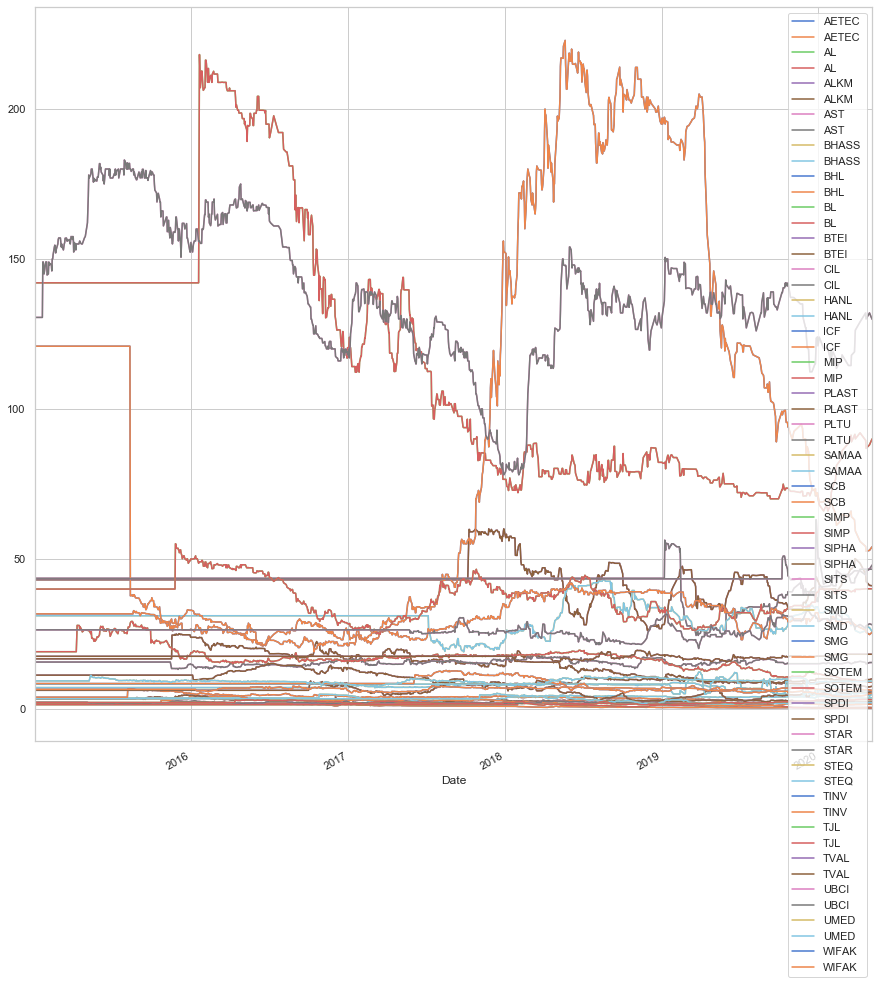

In [15]:
for entreprise in entreprises_donnee_manquantes:
    dataframe.fillna(value=((dataframe.max()+dataframe.min())/2)).loc[:,entreprise].plot(figsize=(15,15),legend=True);
    dataframe.fillna(value=((dataframe.max()+dataframe.min())/2)).loc[:,entreprise].plot(figsize=(15,15),legend=True);

In [36]:
dataframe=dataframe.fillna(value=((dataframe.max()+dataframe.min())/2))

In [37]:
dataframe.isna().sum().sum()

0

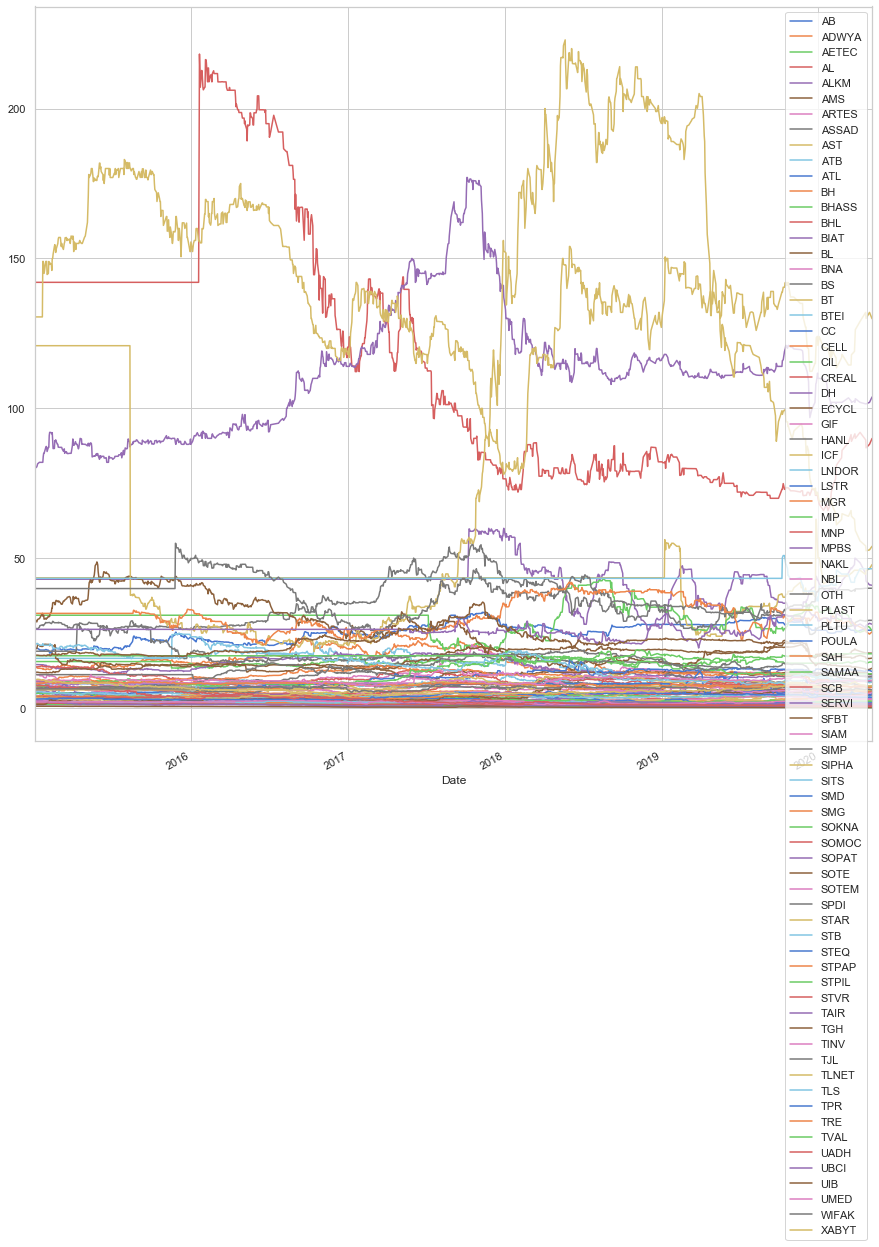

In [38]:
dataframe.plot(figsize=(15,15),legend=True);

###  __$\color{#0000FF}{\text {3 .}}$__ DIVERSIFICATION

In [18]:
evaluate= dataframe.pct_change().mean() * 252
evaluate = pd.DataFrame(evaluate)
evaluate.columns = ["turn_over"]
volatilite = dataframe.pct_change().std() * np.sqrt(252)
evaluate["volatility"] = volatilite
evaluate

rendement  volatilite
AB      0.079114    0.173799
ADWYA  -0.156545    0.252697
AETEC  -0.198330    0.582826
AL     -0.046119    0.381414
ALKM    0.041836    0.336521
AMS    -0.423268    0.389223
ARTES  -0.052424    0.195339
ASSAD   0.057113    0.276013
AST     0.116472    0.468013
ATB    -0.000727    0.262956
ATL    -0.101519    0.227482
BH     -0.074663    0.254330
BHASS   0.008186    0.322147
BHL    -0.131710    0.354729
BIAT    0.080637    0.188517
BL      0.005156    0.238358
BNA    -0.028324    0.228345
BS      0.046449    0.210406
BT     -0.021982    0.186131
BTEI   -0.048656    0.403403
CC      0.017075    0.386760
CELL   -0.159778    0.387834
CIL     0.028875    0.248565
CREAL   0.020025    0.365608
DH     -0.047289    0.224888
ECYCL  -0.153312    0.283631
GIF    -0.362729    0.307071
HANL   -0.011773    0.231268
ICF     0.001901    0.528633
LNDOR   0.174170    0.326341
...          ...         ...
SITS    0.041931    0.328340
SMD    -0.057669    0.371329
SMG    -0.010947    0.286990
SOKNA  -0.133048    0.293673
SOMOC  -0.156169    0.291253
SOPAT  -0.027774    0.424188
SOTE    0.382058    0.402492
SOTEM   0.175851    0.422279
SPDI   -0.063563    0.257845
STAR    0.036062    0.274047
STB    -0.032551    0.288757
STEQ    0.392675    1.071983
STPAP   0.113214    0.259866
STPIL   0.135235    0.273125
STVR    0.138265    0.241353
TAIR   -0.016568    0.328294
TGH    -0.201276    0.336342
TINV   -0.075122    0.291586
TJL    -0.123681    0.360014
TLNET   0.163275    0.260290
TLS    -0.175032    0.269412
TPR     0.064316    0.204430
TRE    -0.018603    0.197961
TVAL    0.019148    0.142135
UADH   -0.559169    0.357130
UBCI    0.047645    0.254595
UIB     0.002796    0.182810
UMED    0.024408    0.231786
WIFAK   0.013892    0.232802
XABYT  -0.016457    0.295691

[79 rows x 2 columns]

In [19]:
X = np.asarray([np.asarray(evaluate['turn_over']),np.asarray(evaluate['volatility'])]).T

In [20]:
inertie = []
for k in range(2,19):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    inertie.append(k_means.inertia_)

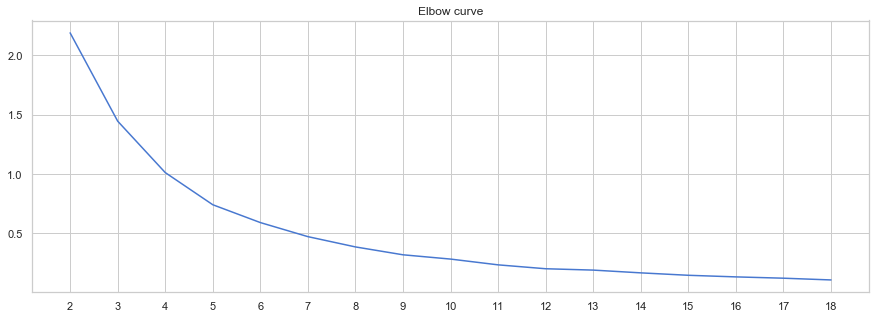

In [21]:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 19), inertie)
plt.xticks(range(2,19))
plt.grid(True)
plt.title('Elbow curve');

In [23]:
%matplotlib inline

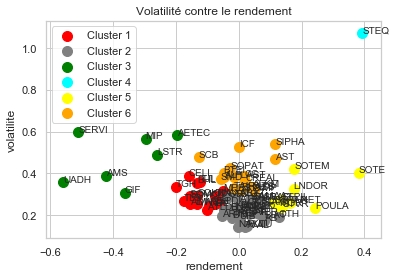

In [24]:
txt = evaluate.index
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 10)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'GRAY', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'yellow', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')

n = X.shape[0]
for i, word in zip(range(X.shape[0]), txt) :
    plt.annotate(word, (X[i, 0], X[i, 1]))
    
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.ylabel('volatility')
plt.xlabel('turn_over')
plt.title("Volatility vs turn over")
plt.legend()
plt.show()

In [25]:
from scipy import cluster

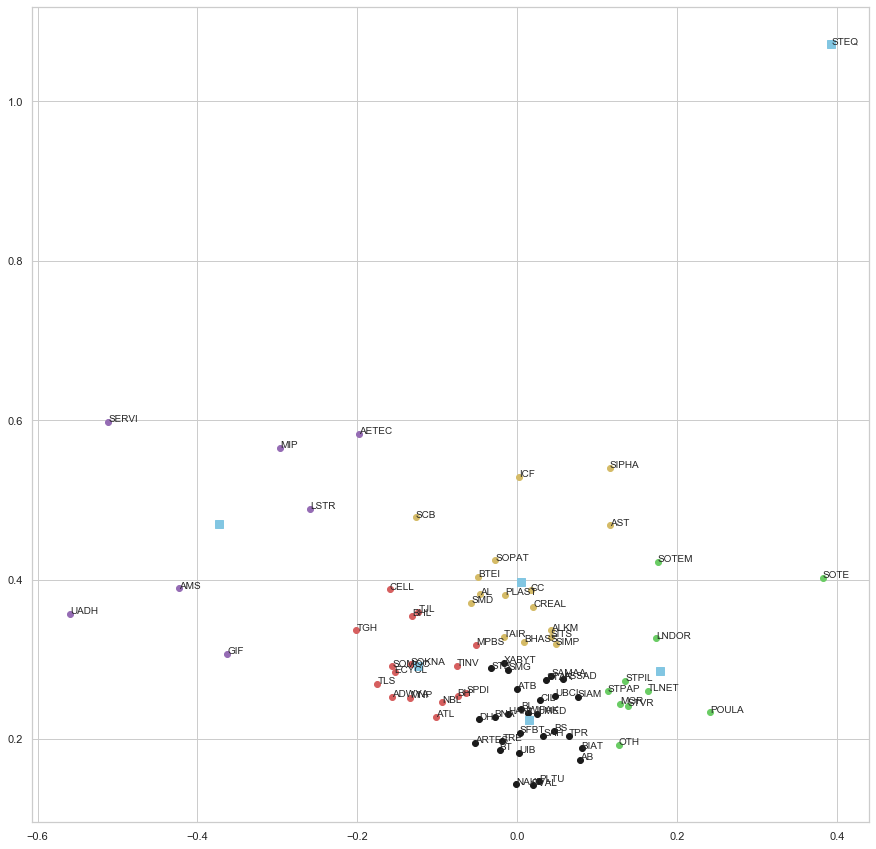

In [26]:
data=X
centroids,_ = cluster.vq.kmeans(data, 6)
idx,_ = cluster.vq.vq(data,centroids)


fig = plt.figure(figsize=(15, 15))
plt.plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om',
        
     data[idx==5,0],data[idx==5,1],'ok',
           
        
        
        )
n = X.shape[0]
for i, word in zip(range(X.shape[0]), txt) :
    plt.annotate(word, (X[i, 0], X[i, 1]))
    
plt.plot(centroids[:,0],centroids[:,1],'sc',markersize=8)
plt.show()

In [27]:
for i in range(0,dataframe.columns[idx].nunique()):
    print("____________________________")
    print("____________________________")
    print(dataframe.columns[idx == i])
    print("____________________________")
    print("____________________________")

____________________________
____________________________
Index(['STEQ'], dtype='object')
____________________________
____________________________
____________________________
____________________________
Index(['AL', 'ALKM', 'AST', 'BHASS', 'BTEI', 'CC', 'CREAL', 'ICF', 'PLAST',
       'SCB', 'SIMP', 'SIPHA', 'SITS', 'SMD', 'SOPAT', 'TAIR'],
      dtype='object')
____________________________
____________________________
____________________________
____________________________
Index(['ADWYA', 'ATL', 'BH', 'BHL', 'CELL', 'ECYCL', 'MNP', 'MPBS', 'NBL',
       'SOKNA', 'SOMOC', 'SPDI', 'TGH', 'TINV', 'TJL', 'TLS'],
      dtype='object')
____________________________
____________________________
____________________________
____________________________
Index(['LNDOR', 'MGR', 'OTH', 'POULA', 'SOTE', 'SOTEM', 'STPAP', 'STPIL',
       'STVR', 'TLNET'],
      dtype='object')
____________________________
____________________________
____________________________
____________________________
Ind

## __$\color{#0000FF}{\text {4 .}}$__ ANAMOLY DETECTION

### __$\color{#0000FF}{\text {4 .1.}}$__ Load and Inspect the TUNINDEX STOCK 

[Data Source](https://www.investing.com/indices/tunindex-historical-data): Tunindex (TUNINDEX) 2012-2020

In [2]:
df = pd.read_csv('Tunindex Historical Data.csv')

In [3]:
df=df.iloc[:,0:2]

In [4]:
df.columns=['date','close']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 2 columns):
date     2566 non-null object
close    2566 non-null object
dtypes: object(2)
memory usage: 40.2+ KB


In [6]:
df=df[::-1]

In [7]:
layout = go.Layout(
    title = 'Transaction Value',
    yaxis = dict(title = 'close'),
    xaxis = dict(title = 'date')
    )
trace1 = go.Scatter(x=df.date, y=df.close,
                    mode='lines',
                    name='close')
data = [trace1]
fig = dict(data=data, layout=layout)
pyo.plot(fig, filename = 'plot')

C:\Users\asus\Anaconda3\lib\site-packages\plotly\offline\offline.py:563: UserWarning:

Your filename `plot` didn't end with .html. Adding .html to the end of your file.



'plot.html'

## __$\color{#0000FF}{\text {4 .2.}}$__ Data Preprocessing

In [8]:
df['date']=pd.to_datetime(df['date'])

In [9]:
for i in range (len(df['close'])):
    df['close'][i]= float((df['close'][i]).replace(',', ''))

In [10]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train.shape, test.shape)

(2052, 2) (514, 2)


In [11]:


scaler = StandardScaler()
scaler = scaler.fit(train[['close']])

train['close'] = scaler.transform(train[['close']])
test['close'] = scaler.transform(test[['close']])

## __$\color{#0000FF}{\text {4 .3.}}$__ Create Training and Test Splits

In [12]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [13]:
time_steps = 60

X_train, y_train = create_dataset(train[['close']], train.close, time_steps)
X_test, y_test = create_dataset(test[['close']], test.close, time_steps)

print(X_train.shape)

(1992, 60, 1)


## __$\color{#0000FF}{\text {4 .4.}}$__ Build an LSTM Autoencoder

In [14]:
timesteps = X_train.shape[1]
num_features = X_train.shape[2]

In [15]:


model = Sequential([
    LSTM(50, input_shape=(timesteps, num_features)),
    Dropout(0.2),
    RepeatVector(timesteps),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(num_features))                 
])

model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
time_distributed (TimeDistri (None, 60, 1)             51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
____________________________________________________

## __$\color{#0000FF}{\text {4 .5.}}$__ Train the Autoencoder

In [16]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=34,
    validation_split=0.2,
    callbacks = [es],
    shuffle=False
)

Train on 1593 samples, validate on 399 samples
Epoch 1/100
1593/1593 [==============================] - 9s 6ms/sample - loss: 0.2266 - val_loss: 0.4039
Epoch 2/100
1593/1593 [==============================] - 3s 2ms/sample - loss: 0.1351 - val_loss: 0.2291
Epoch 3/100
1593/1593 [==============================] - 3s 2ms/sample - loss: 0.1222 - val_loss: 0.2045
Epoch 4/100
1593/1593 [==============================] - 2s 2ms/sample - loss: 0.1169 - val_loss: 0.1436
Epoch 5/100
1593/1593 [==============================] - 2s 2ms/sample - loss: 0.1096 - val_loss: 0.1763
Epoch 6/100
1593/1593 [==============================] - 2s 1ms/sample - loss: 0.0984 - val_loss: 0.1333
Epoch 7/100
1593/1593 [==============================] - 3s 2ms/sample - loss: 0.0983 - val_loss: 0.1070
Epoch 8/100
1593/1593 [==============================] - 3s 2ms/sample - loss: 0.1004 - val_loss: 0.1017
Epoch 9/100
1593/1593 [==============================] - 3s 2ms/sample - loss: 0.0948 - val_loss: 0.1276
Epoch 10

## __$\color{#0000FF}{\text {4 .6.}}$__ Plot Metrics and Evaluate the Model

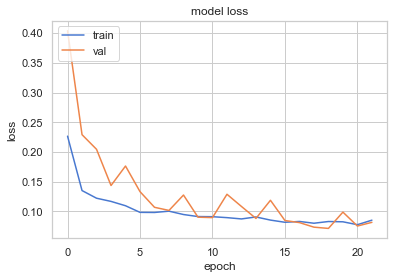

{'loss': [0.22656722804116364,
  0.13508915557886772,
  0.12222621681569734,
  0.1168665468776967,
  0.10956365694639747,
  0.09843879388101581,
  0.09825959652475194,
  0.1004402658201132,
  0.09479413239071374,
  0.09137475569612637,
  0.09114285312681848,
  0.08956167061169493,
  0.08738698473121861,
  0.09070129996096646,
  0.08543099484500538,
  0.08175154954045356,
  0.08314448864680375,
  0.08014964457070461,
  0.08303813112938246,
  0.08255623087838844,
  0.07768959860502739,
  0.08529322965997835],
 'val_loss': [0.40386960261447685,
  0.2290751131853663,
  0.20447777187391034,
  0.14359781343984723,
  0.17634312948562147,
  0.13326875411702277,
  0.10695227205678634,
  0.10169025510549545,
  0.12755161159692852,
  0.09032441701805383,
  0.08962752102386384,
  0.1288574161871633,
  0.10834818626555584,
  0.08821790458116316,
  0.11873966926022579,
  0.08468244792450041,
  0.08121905388091143,
  0.0735483842348694,
  0.0714327879716878,
  0.09884938020679288,
  0.075462883781819

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
history.history

In [18]:
X_train_pred = model.predict(X_train)

train_mae_loss = pd.DataFrame(np.mean(np.abs(X_train_pred - X_train), axis=1), columns=['Error'])

In [19]:
model.evaluate(X_test, y_test)

454/454 [==============================] - 0s 511us/sample - loss: 0.4349


0.43493419908610736

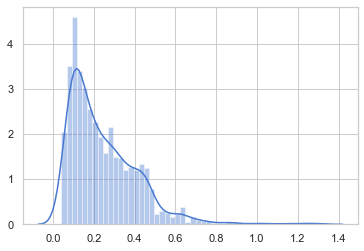

In [20]:
sns.distplot(train_mae_loss, bins=50, kde=True);

In [21]:
X_test_pred = model.predict(X_test)

test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

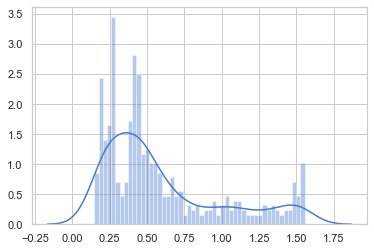

In [22]:
sns.distplot(test_mae_loss, bins=50, kde=True);

## __$\color{#0000FF}{\text {4 .7.}}$__ Detect Anomalies in the TUNINDEX Data

In [23]:
THRESHOLD = 1.5
test_score_df = pd.DataFrame(test[time_steps:])
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['close'] = test[time_steps:].close

In [27]:
layout = go.Layout(
    title = 'Transaction Value',
    yaxis = dict(title = 'close'),
    xaxis = dict(title = 'date')
    )
trace1 =go.Scatter(x=test[time_steps:].date, y=test_score_df.loss,
                    mode='lines',
                    name='Test Loss')
trace2=go.Scatter(x=test[time_steps:].date, y=test_score_df.threshold,
                    mode='lines',
                    name='Threshold')

 
data = [trace1,trace2]
fig = dict(data=data, layout=layout)
pyo.plot(fig, filename = 'plot')

'plot.html'

In [25]:
anomalies = test_score_df[test_score_df.anomaly == True]
anomalies.head()

date     close      loss  threshold  anomaly
392 2018-10-04  4.302096  1.510006        1.5     True
391 2018-10-05  4.345230  1.537085        1.5     True
390 2018-10-08  4.347779  1.547255        1.5     True
389 2018-10-09  4.274104  1.546112        1.5     True
388 2018-10-10  4.314341  1.550107        1.5     True

In [26]:
layout = go.Layout(
    title = 'Transaction Value',
    yaxis = dict(title = 'close'),
    xaxis = dict(title = 'date')
    )
trace1 =go.Scatter(x=test[time_steps:].date, y=scaler.inverse_transform(test[time_steps:].close),
                    mode='lines',
                    name='Close Price')
trace2=go.Scatter(x=anomalies.date, y=scaler.inverse_transform(anomalies.close),
                    mode='markers',
                    name='Anomaly')

 
data = [trace1,trace2]
fig = dict(data=data, layout=layout)
pyo.plot(fig, filename = 'plot')

'plot.html'

### __$\color{#0000FF}{\text {5 .}}$__ CORRELATION MATRIX

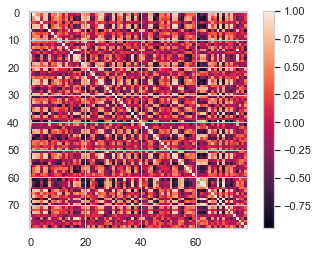

In [54]:
plt.imshow((dataframe.corr()))
plt.colorbar();

In [55]:
corr_data=pd.DataFrame((dataframe.corr()))

In [56]:
corr_data.index=dataframe.columns

In [57]:
corr_data.columns=dataframe.columns

In [58]:
corr_data.head()

AB     ADWYA     AETEC        AL      ALKM       AMS     ARTES  \
AB     1.000000 -0.568258 -0.700907 -0.722455  0.143736 -0.857398 -0.667330   
ADWYA -0.568258  1.000000  0.676573  0.563492  0.293252  0.769617  0.818615   
AETEC -0.700907  0.676573  1.000000  0.831745  0.131348  0.809951  0.826782   
AL    -0.722455  0.563492  0.831745  1.000000  0.034904  0.751692  0.815800   
ALKM   0.143736  0.293252  0.131348  0.034904  1.000000  0.068912  0.171001   

          ASSAD       AST       ATB  ...       TLS       TPR       TRE  \
AB     0.703042 -0.276460 -0.389111  ... -0.693792  0.740007 -0.530519   
ADWYA -0.409421  0.490349  0.433431  ...  0.787982 -0.441605  0.741706   
AETEC -0.613901  0.326412  0.584092  ...  0.739843 -0.813911  0.669572   
AL    -0.543658  0.281168  0.508184  ...  0.676228 -0.829015  0.586782   
ALKM  -0.054892  0.196292 -0.115251  ...  0.359453  0.018397  0.184722   

           TVAL      UADH      UBCI       UIB      UMED     WIFAK     XABYT  
AB    -0.200007 -0.854264 -0.024665  0.765652 -0.041672  0.190391 -0.536808  
ADWYA  0.213513  0.771220 -0.115538 -0.064148 -0.077637 -0.042710  0.146376  
AETEC  0.296653  0.749245  0.071209 -0.463244 -0.167529 -0.187890  0.268336  
AL     0.322200  0.713482  0.090533 -0.451405 -0.153964 -0.171333  0.176641  
ALKM  -0.008450  0.072658 -0.109958  0.388709 -0.495249  0.109109 -0.187025  

[5 rows x 79 columns]

In [59]:
extracted_colmuns=[]
extracted_indexs=[]
prtf=[]
for i in corr_data.columns:
    for j in corr_data.index:
        if corr_data.loc[j,i]<-0.8 :
            extracted_colmuns.append(i)
            extracted_indexs.append(j)
    
for i in range(len(extracted_colmuns)):
    prtf.append(extracted_colmuns[i] +' and ' + extracted_indexs[i])

In [60]:
rendement= dataframe.pct_change().mean() *252*5
rendement = pd.DataFrame(rendement)
rendement.columns = ["rendement"]

In [61]:
ex_row_rend=rendement.loc[(extracted_indexs),:]

In [62]:
ex_col_rend=rendement.loc[(extracted_colmuns),:]

In [63]:
prtf_rend=[]
for i in range(len(ex_col_rend["rendement"])):
    prtf_rend.append(ex_col_rend["rendement"].iloc[i]+ex_row_rend["rendement"].iloc[i])

In [64]:
portfolio = pd.DataFrame(prtf_rend)

In [65]:
portfolio.columns = ["rendement"]
portfolio.index = prtf
portfolio=portfolio.sort_values(by=["rendement"]) 

In [66]:
removed=[]
xx=portfolio
for i in range (0,len ( portfolio["rendement"] )-1):
    if (portfolio["rendement"].iloc[i]==portfolio["rendement"].iloc[i+1]):
        xx=xx.drop(portfolio.index[i])
portfolio=xx

In [67]:
portfolio.shape

(57, 1)

In [68]:
portfolio.head()

rendement
UADH and AB     -2.400277
OTH and UADH    -2.161605
STVR and UADH   -2.104523
TLNET and UADH  -1.979473
AMS and AB      -1.720768

In [69]:
new_port=portfolio.nlargest(20, ['rendement']) 

In [70]:
new_port

rendement
SOKNA and SOTE    1.245050
ARTES and POULA   0.946184
XABYT and LNDOR   0.788568
STPAP and CC      0.651443
LSTR and SOTE     0.613288
AL and TLNET      0.585779
POULA and SCB     0.572127
POULA and SOKNA   0.543062
STVR and AL       0.460729
POULA and ECYCL   0.441742
POULA and SOMOC   0.427457
POULA and CELL    0.409413
BTEI and STPAP    0.322788
POULA and AETEC   0.216654
TGH and POULA     0.201921
TPR and AL        0.090983
ATL and STPAP     0.058477
TLNET and ECYCL   0.049814
STVR and SOKNA    0.026084
CELL and TLNET    0.017485

In [71]:
names=[]
for i in range(len ( new_port["rendement"] )):
    names.append(new_port.index[i].split(' and ')[0])
    names.append(new_port.index[i].split(' and ')[1])
names=list(set(names))

In [72]:
rendement.loc[(names),:]

rendement
ARTES  -0.262118
POULA   1.208302
TPR     0.321578
CELL   -0.798888
SCB    -0.636175
LSTR   -1.297002
ECYCL  -0.766559
SOMOC  -0.780845
AL     -0.230594
XABYT  -0.082284
STPAP   0.566070
STVR    0.691323
TLNET   0.816374
LNDOR   0.870851
SOKNA  -0.665239
ATL    -0.507594
BTEI   -0.243282
AETEC  -0.991648
SOTE    1.910290
CC      0.085373
TGH    -1.006380

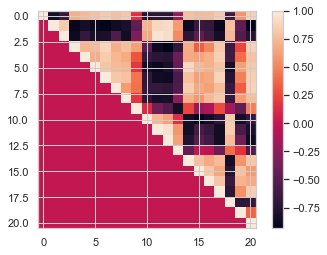

In [73]:
plt.imshow(np.triu(corr_data.loc[names,names]))
plt.colorbar();

In [74]:
rentavg= dataframe.loc[:,names].pct_change().mean() 
rentavg = pd.DataFrame(rentavg)
rentavg.columns = ["rendement"]

In [75]:
rent= dataframe.loc[:,names].pct_change()
rent = pd.DataFrame(rent)

The daily expected portfolio return: 0.03247%
Expected annualised portfolio simple return : 8.18163%


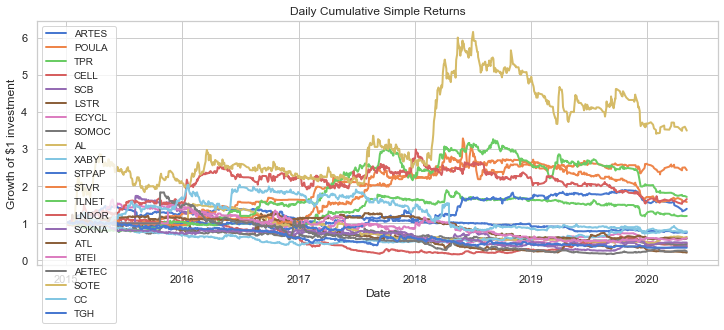

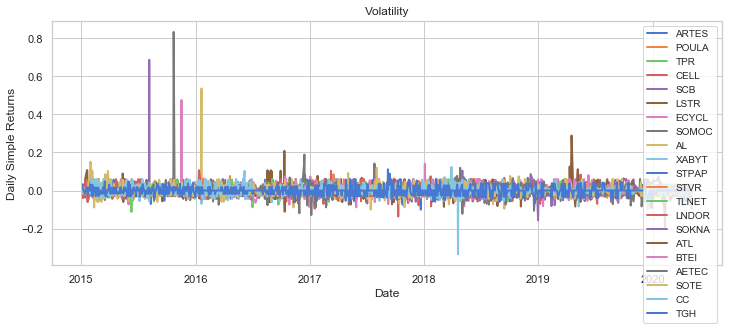

In [76]:
# Calculate the expected portfolio daily performance with random weights 
random.seed(100)
n=len(names)
portfolioSimpleReturn=0
while portfolioSimpleReturn<0.0003:
    weights = [random.randint(1,100000000) for x in range(n)]
    sum_weights = sum(weights)
    weights = [w/sum_weights for w in weights]
    portfolioSimpleReturn = np.sum(rentavg["rendement"]*weights)  #NOTE: Be sure to account for rounding of decimal
rentavg['weights']=weights
print("The daily expected portfolio return: " +str(round(portfolioSimpleReturn*100,5))+'%')
print("Expected annualised portfolio simple return : "+ str(round(portfolioSimpleReturn * 252*100,5))+'%')
fig = plt.figure(figsize=(12.2,4.5))
dailyCumulSimplReturn = (rent+1).cumprod()
for c in dailyCumulSimplReturn.columns.values:
    plt.plot(dataframe.index, dailyCumulSimplReturn[c], lw=2, label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
# Place the legend in the upper left corner with font size of 10
plt.legend(loc='upper left', fontsize=10) 
plt.xlabel("Date")
plt.ylabel("Growth of $1 investment")
plt.title("Daily Cumulative Simple Returns")
plt.show()
plt.figure(figsize=(12,4.5)) #Set the figure size (width, height)
# Loop through each stock and plot the simple returns for each day
for c in rent.columns.values:
    plt.plot(dataframe.index, rent[c], lw=2, label=c)
# Place the legend in the upper left corner with font size of 10
plt.legend(loc='upper right', fontsize=10) 

plt.title('Volatility')
plt.ylabel('Daily Simple Returns') #Label the Y-axis simple returns 
plt.xlabel('Date')
plt.show()


#   __$\color{#0000FF}{\text {B .}}$__ TUNINDEX20

### __$\color{#0000FF}{\text {1 .}}$__ IMPORTING AND VISUALIZATION COMPONENTS FOR TUNINDEX

[Data Source](https://www.investing.com/indices/tunindex20-components): Tunindex20 components (TUNINDEX20) 2016-2020

In [2]:
nomsfichiers20 = glob(r"C:\Users\asus\Desktop\adf prjt\tunindex20\* Historical Data.csv")

In [3]:
dfs20 = [pd.read_csv(ff, thousands=',') for ff in nomsfichiers20]

In [4]:
new_list_data_frames20 = []
for entreprise20 in dfs20:
    
    entreprise20["Price"] = entreprise20["Price"].replace(',', ".").astype(float)
    entreprise20["Date"] = pd.to_datetime(entreprise20["Date"], infer_datetime_format=True)
    entreprise20 = entreprise20.set_index("Date")
    
    new_list_data_frames20.append(entreprise20)

In [5]:
listes_prix_fermetures20 = []

for entreprise20 in new_list_data_frames20:
    close = entreprise20["Price"].values
    listes_prix_fermetures20.append(close)

dataframe20 = pd.DataFrame(data = listes_prix_fermetures20).T
dataframe20=dataframe20.iloc[0:1045,:]
dataframe20.index=entreprise20.iloc[0:1045,:].index

In [6]:
noms_entreprises20 = []
for i in range(len(nomsfichiers20)):
    x = nomsfichiers20[i].split('\\')[-1]
    noms_entreprises20.append(x)

In [7]:
new_names20=[]
for i in range(len(noms_entreprises20)):
    x = noms_entreprises20[i].replace(" Historical Data.csv","")
    new_names20.append(x)

In [8]:
dataframe20.columns = new_names20

In [16]:
dataframe20=dataframe20[::-1]

In [17]:
dataframe20.head()

ARTES   ATL     BH  BIAT    BNA    BT    CC     DH  ICF   MGR  \
Date                                                                        
2016-02-22   6.16  2.68  13.50  80.0  11.18  8.38  1.34  14.56  NaN  2.20   
2016-02-23   6.25  2.70  13.58  80.5  11.29  8.39  1.36  14.55  NaN  2.22   
2016-02-24   6.10  2.68  13.33  81.5  11.10  8.42  1.34  14.54  NaN  2.21   
2016-02-25   6.15  2.68  13.31  82.0  11.10  8.33  1.33  14.53  NaN  2.22   
2016-02-26   6.26  2.70  13.31  82.0  10.80  8.49  1.31  14.50  NaN  2.20   

             OTH  POULA   SAH   SFBT  STAR   STB  STPAP  TLNET   TPR    UIB  
Date                                                                         
2016-02-22  6.66   5.03  8.84  19.89   NaN  5.30   3.92   3.45  3.00  17.69  
2016-02-23  6.66   4.90  8.86  19.89   NaN  5.44   4.05   3.45  3.00  17.70  
2016-02-24  6.70   5.00  8.84  21.08   NaN  5.55   4.04   3.40  3.05  17.68  
2016-02-25  6.70   4.99  8.92  21.03   NaN  5.53   4.16   3.40  3.05  17.59  
2016-02-26  6.75   4.80  8.80  20.68   NaN  5.45   4.12   3.37  3.08  17.57

In [9]:
dataframe20.isna().sum().sum()

136

In [29]:
entreprises_donnee_manquantes20 = dataframe20.columns[ dataframe20.isna().sum() != 0 ]

In [30]:
entreprises_donnee_manquantes20.shape[0]/20

0.1

In [31]:
for entreprise20 in entreprises_donnee_manquantes20:
    print(entreprise20)

ICF
STAR


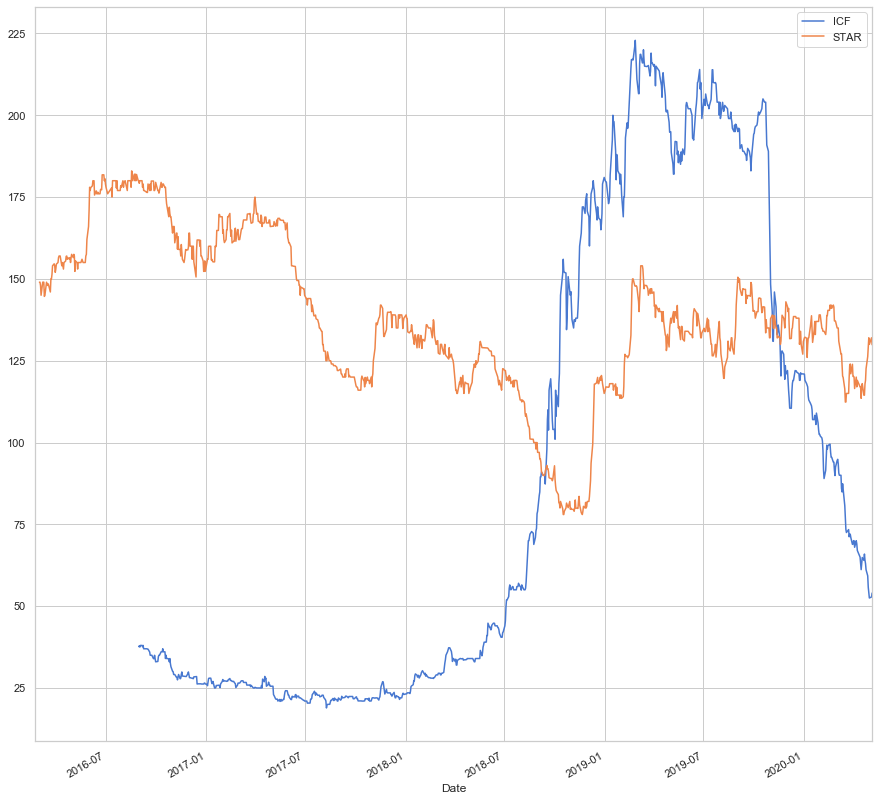

In [32]:
for entreprise20 in entreprises_donnee_manquantes20:
    dataframe20.loc[:,entreprise20].plot(figsize=(15,15),legend=True);

### __$\color{#0000FF}{\text {2 .}}$__ FILLING MISSING VALUES

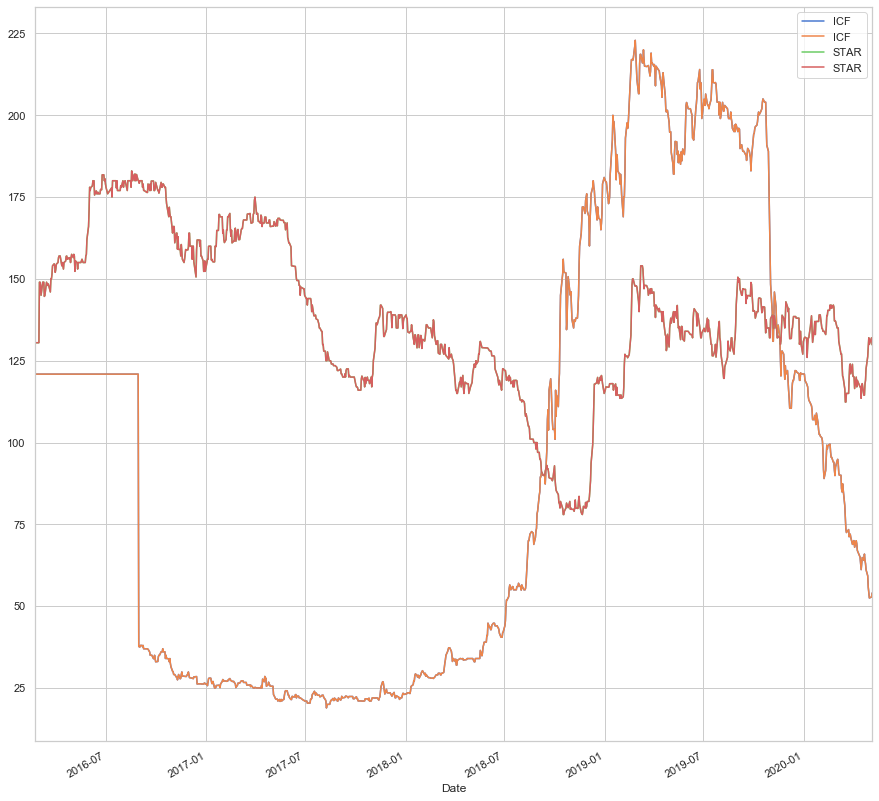

In [89]:
for entreprise20 in entreprises_donnee_manquantes20:
    dataframe20.fillna(value=((dataframe20.max()+dataframe20.min())/2)).loc[:,entreprise20].plot(figsize=(15,15),legend=True);
    dataframe20.fillna(value=((dataframe20.max()+dataframe20.min())/2)).loc[:,entreprise20].plot(figsize=(15,15),legend=True);

In [39]:
dataframe20=dataframe20.fillna(value=((dataframe20.max()+dataframe20.min())/2))

In [40]:
dataframe20.isna().sum().sum()

0

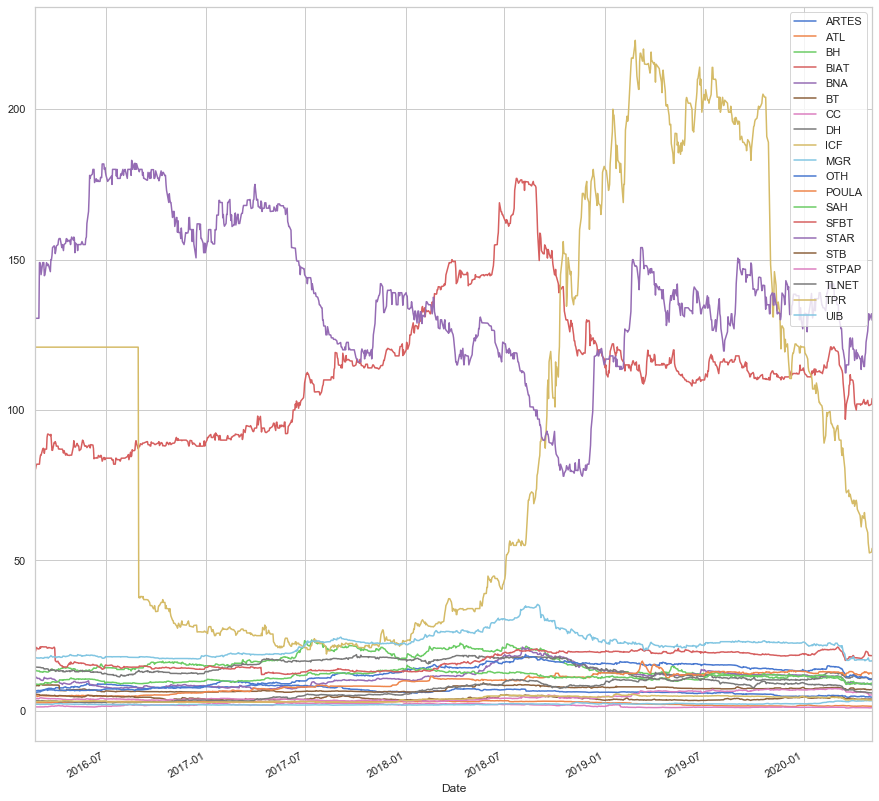

In [41]:
dataframe20.plot(figsize=(15,15),legend=True);

###  __$\color{#0000FF}{\text {3 .}}$__ DIVERSIFICATION

In [92]:
evaluate20= dataframe20.pct_change().mean() * 252
evaluate20 = pd.DataFrame(evaluate20)
evaluate20.columns = ["turn_over"]
volatilite20 = dataframe20.pct_change().std() * np.sqrt(252)
evaluate20["volatility"] = volatilite20
evaluate20

rendement  volatilite
ARTES   0.090718    0.196240
ATL     0.153748    0.229749
BH      0.139032    0.253272
BIAT   -0.045076    0.188824
BNA     0.080050    0.226886
BT      0.058905    0.199748
CC      0.144470    0.425304
DH      0.097832    0.224961
ICF     0.526681    1.157038
MGR    -0.069585    0.244109
OTH    -0.089783    0.191931
POULA  -0.187432    0.231632
SAH     0.009362    0.204492
SFBT    0.043543    0.226555
STAR    0.038038    0.270895
STB     0.115388    0.287239
STPAP  -0.045926    0.259264
TLNET  -0.095879    0.259079
TPR    -0.022241    0.206197
UIB     0.030611    0.183004

In [93]:
X20 = np.asarray([np.asarray(evaluate20['turn_over']),np.asarray(evaluate20['volatility'])]).T

In [94]:
inertie20 = []
for k in range(2,19):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X20)
    inertie20.append(k_means.inertia_)

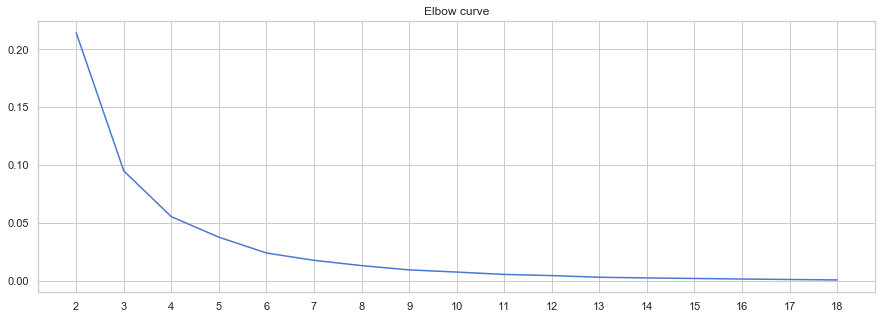

In [95]:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 19), inertie20)
plt.xticks(range(2,19))
plt.grid(True)
plt.title('Elbow curve');

In [96]:
%matplotlib inline

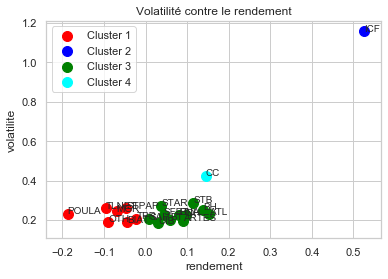

In [97]:
txt20 = evaluate20.index
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 10)
y_kmeans = kmeans.fit_predict(X20)

# Visualising the clusters
plt.scatter(X20[y_kmeans == 0, 0], X20[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X20[y_kmeans == 1, 0], X20[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X20[y_kmeans == 2, 0], X20[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X20[y_kmeans == 3, 0], X20[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

for i, word in zip(range(X20.shape[0]), txt20) :
    plt.annotate(word, (X20[i, 0], X20[i, 1]))
    
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.ylabel('volatility')
plt.xlabel('turn_over')
plt.title("Volatilité contre le rendement")
plt.legend()
plt.show()

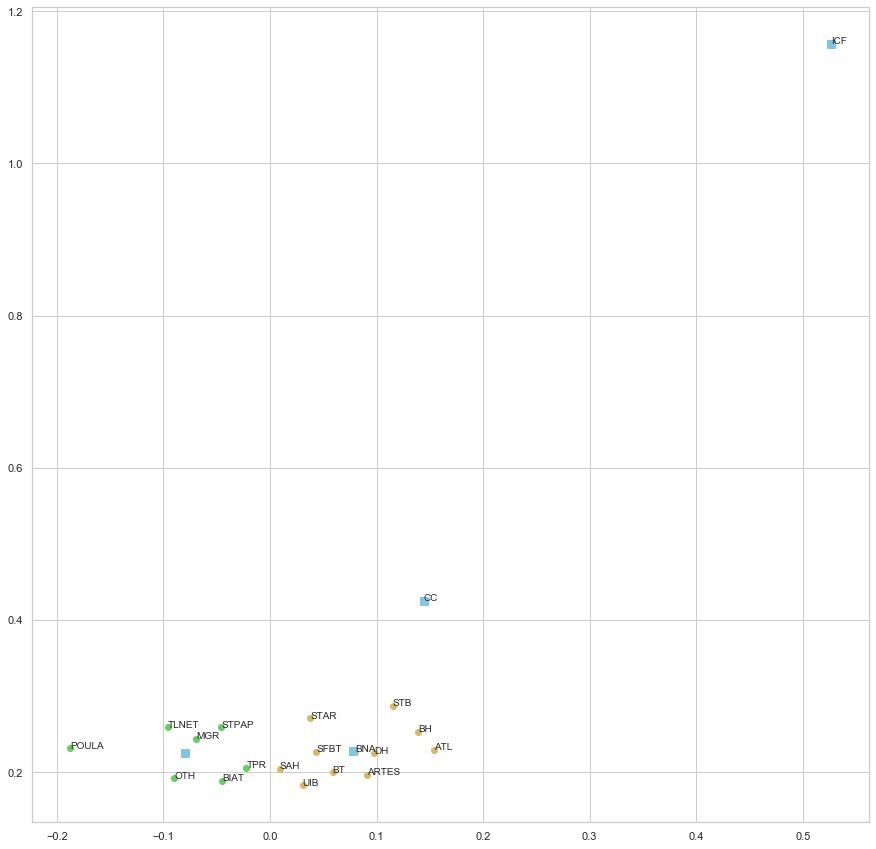

In [98]:
data20=X20
centroids20,_ = cluster.vq.kmeans(data20, 4)
idx20,_ = cluster.vq.vq(data20,centroids20)


fig = plt.figure(figsize=(15, 15))
plt.plot(data20[idx20==0,0],data20[idx20==0,1],'ob',
     data20[idx20==1,0],data20[idx20==1,1],'oy',
     data20[idx20==2,0],data20[idx20==2,1],'or',
     data20[idx20==3,0],data20[idx20==3,1],'og',
     data20[idx20==4,0],data20[idx20==4,1],'om',
        
        
        )
for i, word in zip(range(X20.shape[0]), txt20) :
    plt.annotate(word, (X20[i, 0], X20[i, 1]))
    
plt.plot(centroids20[:,0],centroids20[:,1],'sc',markersize=8)
plt.show()

In [99]:
for i in range(0,dataframe20.columns[idx20].nunique()):
    print("____________________________")
    print("____________________________")
    print(dataframe20.columns[idx20 == i])
    print("____________________________")
    print("____________________________")

____________________________
____________________________
Index(['CC'], dtype='object')
____________________________
____________________________
____________________________
____________________________
Index(['ARTES', 'ATL', 'BH', 'BNA', 'BT', 'DH', 'SAH', 'SFBT', 'STAR', 'STB',
       'UIB'],
      dtype='object')
____________________________
____________________________
____________________________
____________________________
Index(['ICF'], dtype='object')
____________________________
____________________________
____________________________
____________________________
Index(['BIAT', 'MGR', 'OTH', 'POULA', 'STPAP', 'TLNET', 'TPR'], dtype='object')
____________________________
____________________________


## __$\color{#0000FF}{\text {4 .}}$__ ANAMOLY DETECTION

### __$\color{#0000FF}{\text {4 .1.}}$__ Load and Inspect the TUNINDEX20 STOCK 

[Data Source](https://www.investing.com/indices/tunindex20-historical-data): Tunindex20 (TUNINDEX20) 2012-2020

In [28]:
df20 = pd.read_csv('Tunindex20 Historical Data.csv')

In [29]:
df20=df20.iloc[:,0:2]

In [30]:
df20.columns=['date','close']

In [31]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 2 columns):
date     2051 non-null object
close    2051 non-null object
dtypes: object(2)
memory usage: 32.1+ KB


In [32]:
df20=df20[::-1]

In [33]:
layout20 = go.Layout(
    title = 'Transaction Value',
    yaxis = dict(title = 'close'),
    xaxis = dict(title = 'date')
    )
trace1 = go.Scatter(x=df20.date, y=df20.close,
                    mode='lines',
                    name='close')
data20 = [trace1]
fig20 = dict(data=data20, layout=layout20)
pyo.plot(fig20, filename = 'plot')

'plot.html'

## __$\color{#0000FF}{\text {4 .2.}}$__ Data Preprocessing

In [34]:
df20['date']=pd.to_datetime(df20['date'])

In [35]:
for i in range (len(df20['close'])):
    df20['close'][i]= float((df20['close'][i]).replace(',', ''))

In [36]:
train_size20 = int(len(df20) * 0.8)
test_size20 = len(df20) - train_size20
train20, test20 = df20.iloc[0:train_size20], df20.iloc[train_size20:len(df20)]
print(train20.shape, test20.shape)

(1640, 2) (411, 2)


In [37]:
from sklearn.preprocessing import StandardScaler

scaler20 = StandardScaler()
scaler20 = scaler20.fit(train20[['close']])

train20['close'] = scaler20.transform(train20[['close']])
test20['close'] = scaler20.transform(test20[['close']])

## __$\color{#0000FF}{\text {4 .3.}}$__ Create Training and Test Splits

In [38]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [39]:
time_steps20 = 60

X_train20, y_train20 = create_dataset(train20[['close']], train20.close, time_steps20)
X_test20, y_test20 = create_dataset(test20[['close']], test20.close, time_steps20)

print(X_train20.shape)

(1580, 60, 1)


## __$\color{#0000FF}{\text {4 .4.}}$__ Build an LSTM Autoencoder

In [40]:
timesteps20 = X_train20.shape[1]
num_features20 = X_train20.shape[2]

In [41]:
model20 = Sequential([
    LSTM(50, input_shape=(timesteps20, num_features20)),
    Dropout(0.2),
    RepeatVector(timesteps20),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(num_features20))                 
])

model20.compile(loss='mae', optimizer='adam')
model20.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 60, 1)             51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
__________________________________________________

## __$\color{#0000FF}{\text {4 .5.}}$__ Train the Autoencoder

In [42]:
es20 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')
history20 = model20.fit(
    X_train20, y_train20,
    epochs=100,
    batch_size=34,
    validation_split=0.2,
    callbacks = [es20],
    shuffle=False
)

Train on 1264 samples, validate on 316 samples
Epoch 1/100
1264/1264 [==============================] - 6s 4ms/sample - loss: 0.2157 - val_loss: 0.7314
Epoch 2/100
1264/1264 [==============================] - 3s 2ms/sample - loss: 0.1735 - val_loss: 0.7593
Epoch 3/100
1264/1264 [==============================] - 2s 1ms/sample - loss: 0.1551 - val_loss: 0.2271
Epoch 4/100
1264/1264 [==============================] - 2s 1ms/sample - loss: 0.1218 - val_loss: 0.2693
Epoch 5/100
1264/1264 [==============================] - 2s 1ms/sample - loss: 0.1314 - val_loss: 0.1320
Epoch 6/100
1264/1264 [==============================] - 2s 1ms/sample - loss: 0.1187 - val_loss: 0.1292
Epoch 7/100
1264/1264 [==============================] - 2s 1ms/sample - loss: 0.1139 - val_loss: 0.0947
Epoch 8/100
1264/1264 [==============================] - 3s 2ms/sample - loss: 0.1068 - val_loss: 0.0997
Epoch 9/100
1264/1264 [==============================] - 2s 2ms/sample - loss: 0.1011 - val_loss: 0.1228
Epoch 10

## __$\color{#0000FF}{\text {4 .6.}}$__ Plot Metrics and Evaluate the Model

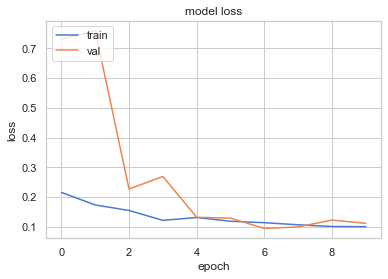

{'loss': [0.21568693224152055,
  0.17353609918699234,
  0.15509926521549403,
  0.12175335999743282,
  0.1313501792116963,
  0.11874042453739463,
  0.11390227617849183,
  0.10683871821582883,
  0.10113369563264371,
  0.10057797979363063],
 'val_loss': [0.7314393114817294,
  0.7593019591479362,
  0.22711819311297393,
  0.26926273234848735,
  0.13203658809578872,
  0.12916772567395923,
  0.09466244410016114,
  0.09971909878091721,
  0.12282546241826649,
  0.11162530520011353]}

In [43]:
plt.plot(history20.history['loss'])
plt.plot(history20.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
history20.history

In [44]:
X_train_pred20 = model20.predict(X_train20)

train_mae_loss20 = pd.DataFrame(np.mean(np.abs(X_train_pred20 - X_train20), axis=1), columns=['Error'])

In [45]:
model20.evaluate(X_test20, y_test20)

351/351 [==============================] - 0s 480us/sample - loss: 0.0907


0.09069512113716528

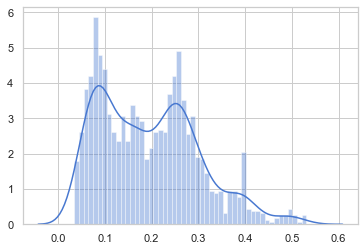

In [46]:
sns.distplot(train_mae_loss20, bins=50, kde=True);

In [47]:
X_test_pred20= model20.predict(X_test20)

test_mae_loss20 = np.mean(np.abs(X_test_pred20 - X_test20), axis=1)

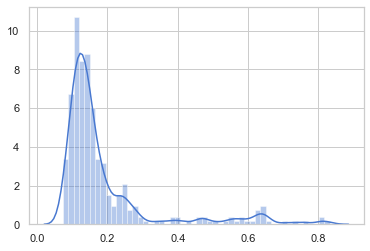

In [48]:
sns.distplot(test_mae_loss20, bins=50, kde=True);

## __$\color{#0000FF}{\text {4 .7.}}$__ Detect Anomalies in the TUNINDEX20 Data

In [49]:
THRESHOLD20 = 0.8
test_score_df20 = pd.DataFrame(test20[time_steps20:])
test_score_df20['loss'] = test_mae_loss20
test_score_df20['threshold'] = THRESHOLD20
test_score_df20['anomaly'] = test_score_df20.loss > test_score_df20.threshold
test_score_df20['close'] = test20[time_steps20:].close

In [53]:
layout = go.Layout(
    title = 'Transaction Value',
    yaxis = dict(title = 'close'),
    xaxis = dict(title = 'date')
    )
trace1 =go.Scatter(x=test20[time_steps20:].date, y=test_score_df20.loss,
                    mode='lines',
                    name='Test Loss')
trace2=go.Scatter(x=test20[time_steps20:].date, y=test_score_df20.threshold,
                    mode='lines',
                    name='Threshold')

 
data = [trace1,trace2]
fig = dict(data=data, layout=layout)
pyo.plot(fig, filename = 'plot')

'plot.html'

In [51]:
anomalies20 = test_score_df20[test_score_df20.anomaly == True]
anomalies20.head()

date     close      loss  threshold  anomaly
27 2020-03-23  0.865008  0.812712        0.8     True
26 2020-03-24  0.980224  0.832390        0.8     True
25 2020-03-25  1.017629  0.804083        0.8     True

In [52]:

layout = go.Layout(
    title = 'Transaction Value',
    yaxis = dict(title = 'close'),
    xaxis = dict(title = 'date')
    )
trace1 =go.Scatter(x=test20[time_steps20:].date, y=scaler20.inverse_transform(test20[time_steps20:].close),
                    mode='lines',
                    name='Close Price')
trace2=go.Scatter(x=anomalies20.date, y=scaler20.inverse_transform(anomalies20.close),
                    mode='markers',
                    name='Anomaly')

 
data = [trace1,trace2]
fig = dict(data=data, layout=layout)
pyo.plot(fig, filename = 'plot')

'plot.html'

### __$\color{#0000FF}{\text {5 .}}$__ CORRELATION MATRIX

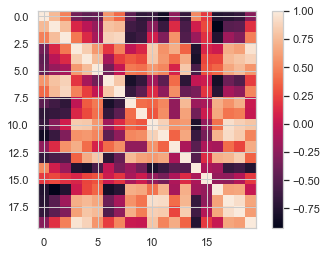

In [126]:
plt.imshow((dataframe20.corr()))
plt.colorbar();

In [127]:
corr_data20=pd.DataFrame((dataframe20.corr()))

In [128]:
corr_data20.index=dataframe20.columns

In [129]:
corr_data20.columns=dataframe20.columns

In [130]:
corr_data20.head()

ARTES       ATL        BH      BIAT       BNA        BT        CC  \
ARTES  1.000000  0.750136  0.491923 -0.354593 -0.448009 -0.412496  0.583764   
ATL    0.750136  1.000000  0.773029  0.114753 -0.041761 -0.202106  0.792428   
BH     0.491923  0.773029  1.000000  0.457813  0.134845 -0.121051  0.868659   
BIAT  -0.354593  0.114753  0.457813  1.000000  0.849293  0.597354  0.190056   
BNA   -0.448009 -0.041761  0.134845  0.849293  1.000000  0.763992 -0.130756   

             DH       ICF       MGR       OTH     POULA       SAH      SFBT  \
ARTES  0.392195 -0.465979 -0.678868 -0.638331 -0.829035 -0.230811 -0.648951   
ATL    0.755901 -0.596133 -0.654979 -0.269700 -0.635394  0.136020 -0.551483   
BH     0.901484 -0.679586 -0.611742  0.067660 -0.299388  0.567645 -0.517945   
BIAT   0.503471 -0.017520  0.117991  0.837024  0.570270  0.692312  0.375452   
BNA    0.230086  0.345462  0.273803  0.822880  0.594390  0.412862  0.690996   

           STAR       STB     STPAP     TLNET       TPR       UIB  
ARTES  0.530971  0.205900 -0.745275 -0.715296 -0.657631 -0.266785  
ATL    0.070270  0.268650 -0.925808 -0.487633 -0.461304  0.166334  
BH    -0.176821  0.168928 -0.738541 -0.158681 -0.292437  0.491764  
BIAT  -0.740927  0.107711  0.047833  0.696207  0.632805  0.956150  
BNA   -0.790641  0.253561  0.258072  0.747686  0.809044  0.879019

Now we will extract the negatively correlated stocks 

In [131]:
extracted_colmuns20=[]
extracted_indexs20=[]
prtf20=[]
for i in corr_data20.columns:
    for j in corr_data20.index:
        if corr_data20.loc[j,i]<-0.8 :
            extracted_colmuns20.append(i)
            extracted_indexs20.append(j)
    
for i in range(len(extracted_colmuns20)):
    prtf20.append(extracted_colmuns20[i] +' and ' + extracted_indexs20[i])

calculate the returns of each stock

In [132]:
rendement20= dataframe20.pct_change().mean() *252*5
rendement20 = pd.DataFrame(rendement20)
rendement20.columns = ["rendement"]

In [133]:
ex_row_rend20=rendement20.loc[(extracted_indexs20),:]

In [134]:
ex_col_rend20=rendement20.loc[(extracted_colmuns20),:]

In [135]:
prtf_rend20=[]
for i in range(len(ex_col_rend20["rendement"])):
    prtf_rend20.append(ex_col_rend20["rendement"].iloc[i]+ex_row_rend20["rendement"].iloc[i])

In [136]:
portfolio20 = pd.DataFrame(prtf_rend20)

In [137]:
portfolio20.columns = ["rendement"]
portfolio20.index = prtf20
portfolio20=portfolio20.sort_values(by=["rendement"]) 

In [138]:
removed20=[]
xx20=portfolio20
for i in range (0,len ( portfolio20["rendement"] )-1):
    if (portfolio20["rendement"].iloc[i]==portfolio20["rendement"].iloc[i+1]):
        xx20=xx20.drop(portfolio20.index[i])
portfolio20=xx20

In [139]:
portfolio20.shape

(3, 1)

In [140]:
portfolio20.head()

rendement
POULA and ARTES  -0.483570
STPAP and CC      0.492720
STPAP and ATL     0.539112

In [141]:
new_port20=portfolio20.nlargest(20, ['rendement']) 

In [142]:
new_port20

rendement
STPAP and ATL     0.539112
STPAP and CC      0.492720
POULA and ARTES  -0.483570

In [143]:
names20=[]
for i in range(len ( new_port20["rendement"] )):
    names20.append(new_port20.index[i].split(' and ')[0])
    names20.append(new_port20.index[i].split(' and ')[1])
names=list(set(names20))

In [144]:
rendement20.loc[(names20),:]

rendement
STPAP  -0.229629
ATL     0.768740
STPAP  -0.229629
CC      0.722349
POULA  -0.937159
ARTES   0.453588

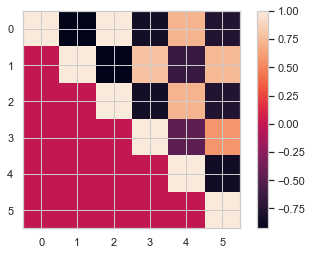

In [145]:
plt.imshow(np.triu(corr_data20.loc[names20,names20]))
plt.colorbar();

In [146]:
rentavg20= dataframe20.loc[:,names20].pct_change().mean() 
rentavg20 = pd.DataFrame(rentavg20)
rentavg20.columns = ["rendement"]

In [147]:
rent20= dataframe20.loc[:,names20].pct_change()
rent20 = pd.DataFrame(rent20)

we are going to fix a threshold for the portfolio simple returns around 0.003

The daily expected portfolio return: 0.03459%
Expected annualised portfolio simple return : 8.7155%


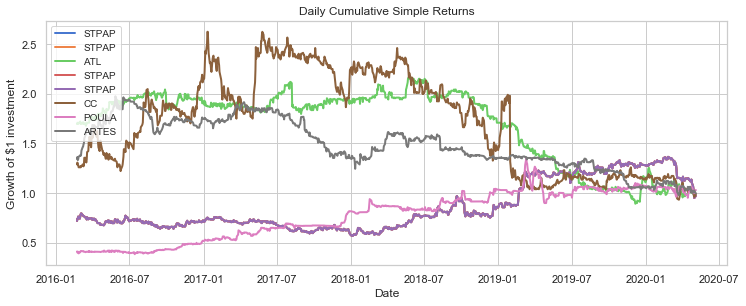

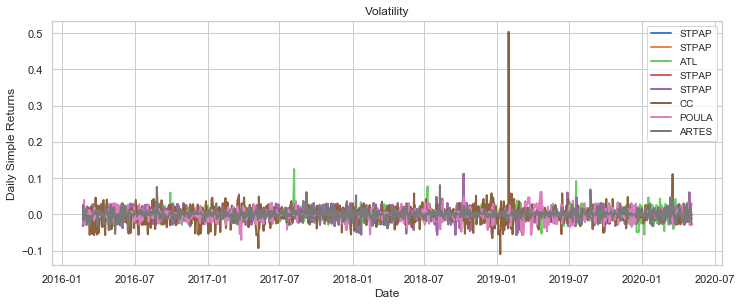

In [148]:
# Calculate the expected portfolio daily performance with random weights 
n20=len(names20)
random.seed(100)
portfolioSimpleReturn20=0
while portfolioSimpleReturn20<0.0003:
    weights20 = [random.randint(1,100000000) for x in range(n20)]
    sum_weights20 = sum(weights20)
    weights20 = [w/sum_weights20 for w in weights20]
    portfolioSimpleReturn20 = np.sum(rentavg20["rendement"]*weights20) #NOTE: Be sure to account for rounding of decimal
rentavg20['weights']=weights20
rentavg20['weights']=weights20
print("The daily expected portfolio return: " +str(round(portfolioSimpleReturn20*100,5))+'%')
print("Expected annualised portfolio simple return : "+ str(round(portfolioSimpleReturn20 * 252*100,5))+'%')
fig = plt.figure(figsize=(12.2,4.5))
dailyCumulSimplReturn20 = (rent20+1).cumprod()
for c in dailyCumulSimplReturn20.columns.values:
    plt.plot(dataframe20.index, dailyCumulSimplReturn20[c], lw=2, label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
# Place the legend in the upper left corner with font size of 10
plt.legend(loc='upper left', fontsize=10) 
plt.xlabel("Date")
plt.ylabel("Growth of $1 investment")
plt.title("Daily Cumulative Simple Returns")
plt.show()
plt.figure(figsize=(12,4.5)) #Set the figure size (width, height)
# Loop through each stock and plot the simple returns for each day
for c in rent20.columns.values:
    plt.plot(dataframe20.index, rent20[c], lw=2, label=c)
# Place the legend in the upper left corner with font size of 10
plt.legend(loc='upper right', fontsize=10) 

plt.title('Volatility')
plt.ylabel('Daily Simple Returns') #Label the Y-axis simple returns 
plt.xlabel('Date')
plt.show()


# __$\color{#0000FF}{\text {RESULTS}}$__ AND __$\color{#0000FF}{\text {DISCUSSION}}$__

## DIVERSIFICATION

* ####  In the diversification analysis we've seen that tunindex is more diversifyed then tunindex20

## ANAMOLY DETECTION

* ####  In the anamoly detection analysis we've seen that tunindex and tunindex20 show similar attitude

## PROFIT

* ####  In the profit analysis we've seen that tunindex20 promise more profit then tunindex with around 1.5%

# __$\color{#0000FF}{\text {CONCLUSION:}}$__ investing in TUNINDEX is the best choice